# Plotting Fraunhofer Lines



## This is what I'm supposed to do: 

1. Deblaze and normalize the data by dividing out the echelle blaze function
2. Transform the wavelength solution of the data to constant RV space
3. Download a corresponding synthetic or empirical spectrum and transform its wavelength solution to constant RV space
4. Run a chi-squared test on the data and the empirical spectrum to determine doppler shift
5. Shift the data to be in the rest frame


## What I learned from trial 2: 

1. the data set i was using involves 2d arrays so I need to pick the right wavelength range nextime! Through observation ive decided to go with row 69 of the sciflux 2d array set. 

2. when i get there, there will be someissues with the normalization, but perhaps the above obersvation will resolve that issue

### doing 0: reducing the spectra to be 1D:


In [18]:
#importing recommended libraries: 

from astropy.io import fits
import matplotlib.pylab as plt
import numpy as np
import scipy.interpolate
from scipy.interpolate import splev, splrep

In [19]:
import seaborn as sns
sns.set_theme()

## Data set source:

use the following link: 

<https://neid.ipac.caltech.edu/search.php>

if it doesnt do it automatically, the object is HD 10700 and the data level is 1 

>The wavelength range Im looking for is pretty small, but somwhere with 5700 to 5900 angstroms is plenty to account for doppler shift

In [20]:
#reading in data and assigning it to arrays 
#for windows, the path needs double backslashes when copying as a location

star = 'HD 10700' 
data_path = 'C:\\Users\\alica\workspace\\Fraunhofer Line Drafts\\neidL1_20220118T021017.fits' 
# APF_flux_path = '/datag/blpd0/datax/apf/rarj.224.fits'

file = fits.open(data_path)
# fl_file = fits.open(APF_flux_path)
wl_raw = file['SCIWAVE'].data
flux_raw = file['SCIFLUX'].data

#so far I am only working with one file

In [21]:
file.info() #this just reads the table values in a simplifed format

Filename: C:\Users\alica\workspace\Fraunhofer Line Drafts\neidL1_20220118T021017.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     745   ()      
  1  SCIFLUX       1 ImageHDU        12   (9216, 122)   float64   
  2  SKYFLUX       1 ImageHDU        12   (9216, 122)   float64   
  3  CALFLUX       1 ImageHDU        12   (9216, 122)   float64   
  4  SCIVAR        1 ImageHDU        12   (9216, 122)   float32   
  5  SKYVAR        1 ImageHDU        12   (9216, 122)   float32   
  6  CALVAR        1 ImageHDU        12   (9216, 122)   float32   
  7  SCIWAVE       1 ImageHDU      2451   (9216, 122)   float64   
  8  SKYWAVE       1 ImageHDU      2451   (9216, 122)   float64   
  9  CALWAVE       1 ImageHDU      2451   (9216, 122)   float64   


_Now note here that the dimensions were obsviously 2d but I skimmed over that and didnt assign my values correctly, or maybe I did who knows that is yet to be determined (Alicia update this when you know whats going on thx)_

In [22]:
#determing which row i want for the target wavelenght range 
c = 0
for i in wl_raw:
    print('row #',c,i)
    c+=1

row # 0 [nan nan nan ... nan nan nan]
row # 1 [nan nan nan ... nan nan nan]
row # 2 [0. 0. 0. ... 0. 0. 0.]
row # 3 [3570.94366773 3570.95346759 3570.96326695 ... 3640.05422351 3640.05950523
 3640.06478654]
row # 4 [3591.94333539 3591.95345391 3591.96357157 ... 3661.51064267 3661.51574775
 3661.5208521 ]
row # 5 [3613.47983397 3613.48968218 3613.49953003 ... 3683.35192178 3683.3572001
 3683.36247795]
row # 6 [3635.09951287 3635.10952407 3635.11953464 ... 3705.28990997 3705.29496562
 3705.30002037]
row # 7 [3656.83234294 3656.84273428 3656.85312458 ... 3727.53853981 3727.54347257
 3727.54840422]
row # 8 [3679.15733627 3679.16745744 3679.17757806 ... 3750.32452243 3750.32990656
 3750.33529018]
row # 9 [3701.75996971 3701.76988439 3701.77979885 ... 3773.4386601  3773.44447495
 3773.45028979]
row # 10 [3724.3714595  3724.38160858 3724.39175719 ... 3796.33909502 3796.34455817
 3796.35002083]
row # 11 [3747.35868092 3747.36891466 3747.3791479  ... 3819.76820418 3819.77368149
 3819.77915828]


In [23]:
#it seems the row we want is 69 bruv

target_wl_range = wl_raw[69]

In [24]:
target_wl_range #good nice and working 

array([5837.53329314, 5837.5492447 , 5837.56519542, ..., 5949.95475469,
       5949.96329397, 5949.97183244])

In [25]:
len(target_wl_range) #for future reference 

9216

In [26]:
#we want the corresponding flux, so 

target_flux_range = flux_raw[69]

In [27]:
target_flux_range

array([3828.50052337, 3596.24330353, 3830.89301819, ..., 5165.02014749,
       5189.70517719, 5166.15802953])

In [28]:
len(target_flux_range) #lenghts are the same so this is easy money 

9216

### Below is the given graph for the wavelength vs pixel count off of the NEID archive for the fits file i am using

![chart_Spectrum-for-neidL1_20220118T021017.fits.png](attachment:chart_Spectrum-for-neidL1_20220118T021017.fits.png)

In [29]:
#well its not working rn but it wasnt important in the first place for this task anyway just something nice to look at 

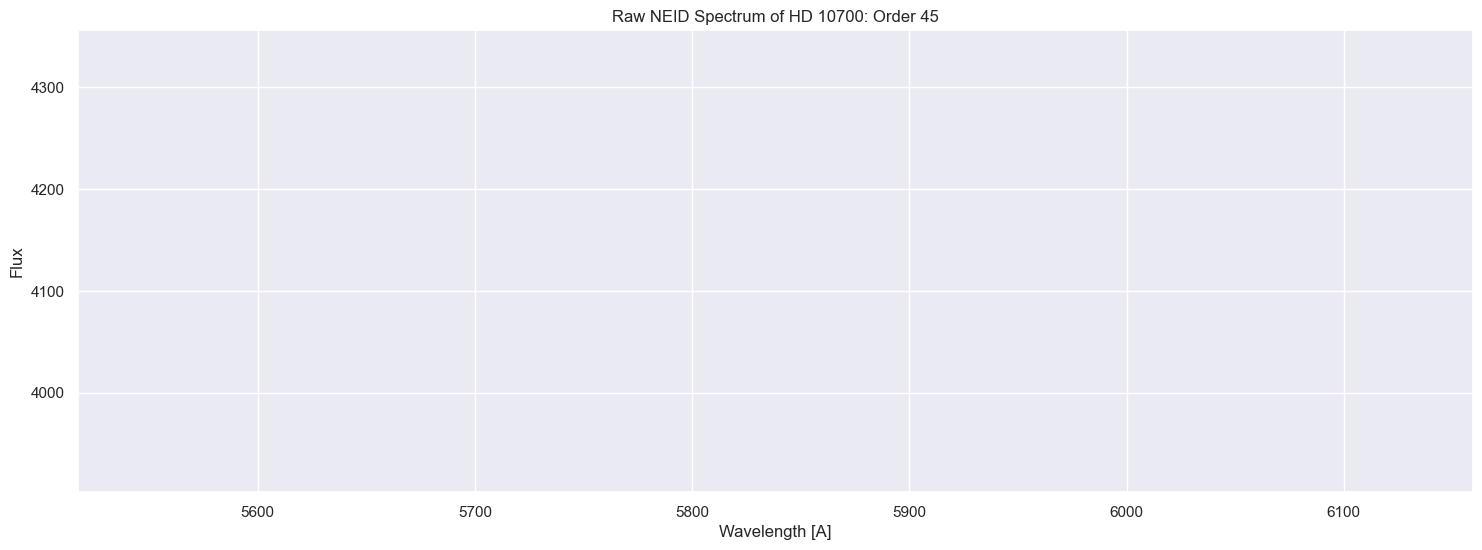

In [30]:
#next block (this plots the raw data hopefully)

plt.rcParams["figure.figsize"] = (18,6)
plt.rcParams.update({'font.size': 20})

order = 45
wl = target_wl_range[order]
flux = target_flux_range[order] #reassigned below, so this will be fixed -- just making a note --
plt.plot(wl,flux)

plt.title('Raw NEID Spectrum of ' + star + ': Order ' + str(order)) #fix title 
plt.xlabel('Wavelength [A]')
plt.ylabel('Flux')
plt.show()
